In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import csv
# 화면에 그래프 그리기
%matplotlib inline
# Korean Setting , Minus 표시
mpl.rcParams['axes.unicode_minus'] = False
# family = 폰트 이름 size = 사이즈 크기
mpl.rc('font', family='D2Coding', size=12)
# Graph 크기 변경
plt.rcParams["figure.figsize"]= (15,9)

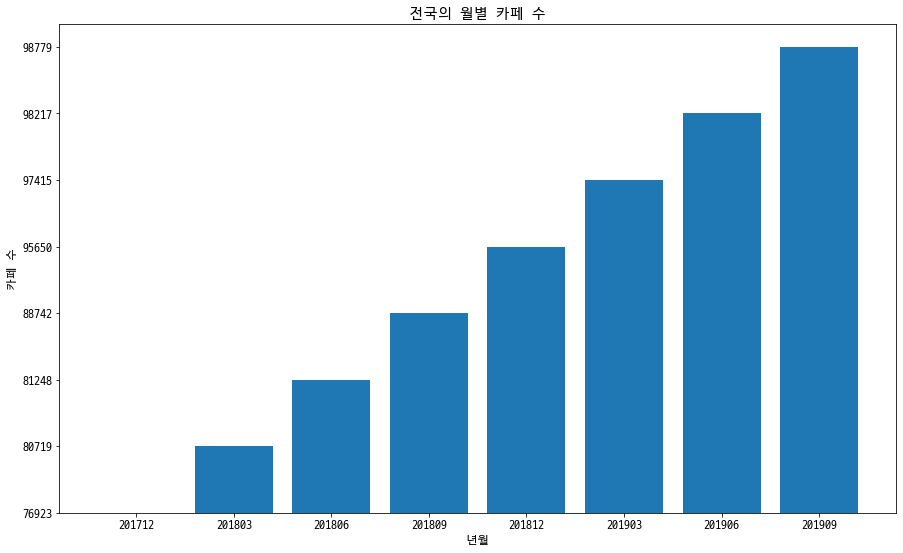

In [2]:
# 1.
with open('cafe_2year.csv', 'r', encoding='utf-8') as f:
    lines = csv.reader(f)
    header = next(lines)
    x_data = []
    y_data = []
    for line in lines:
        if '12' in line[0] or '03' in line[0] or '06' in line[0] or '09' in line[0]:
            x_data.append(line[0])
            y_data.append(line[1])


plt.bar(x_data, y_data)
plt.title('전국의 월별 카페 수')
plt.xlabel('년월')
plt.ylabel('카페 수')
plt.show()

In [3]:
# 2.
class Prac_Files:
    def __init__(self):
        self.f = open('doctor_2019.csv', 'r', encoding='utf-8')

    def header(self, f):
        lines = csv.reader(self.f)
        header = next(lines)
        data_set = np.array([header])
        data_set = np.delete(data_set, 1)
        return data_set

    def location_sum(self, f, location):
        data_set = [0, 0, 0, 0]
        lines = csv.reader(self.f)

        for line in lines:
            if line[0] == location:
                for i in range(len(data_set)):
                    data_set[i] += int(line[i+2])
        return data_set

    def close(self):
        self.f.close()
    
f = Prac_Files();
data = np.empty((0,5))
data = np.append(data, f.header(f))
location = ['서울', '부산', '대구', '인천', '대전', '광주', '울산']
for i in range(len(location)):
    f = Prac_Files();
    data = np.append(data, location[i])
    data = np.append(data, f.location_sum(f, location[i]))
data = data.reshape(8, 5).tolist()

for i in range(len(data)):
    for j in range(len(data[0])):
        print(data[i][j], end=' ')
    print()
f.close()

지역 일반의 수 인턴 수 레지던트 수 전문의 수 
서울 162 1196 4757 9375 
부산 58 197 785 2211 
대구 27 215 712 1436 
인천 47 138 444 1518 
대전 25 142 425 1006 
광주 16 102 356 1006 
울산 19 23 104 467 


In [4]:
# 3.  
with open('doctor2.csv','w',encoding='utf8') as f:
    for i in range(len(data)):
        for j in range(len(data[i])):
            if j == len(data[i])-1:
                f.write(data[i][j])
                break
            else:
                f.write(data[i][j])
                f.write(',')
        f.writelines('\n')
    print('doctor2.csv 파일 쓰기 완료')

doctor2.csv 파일 쓰기 완료


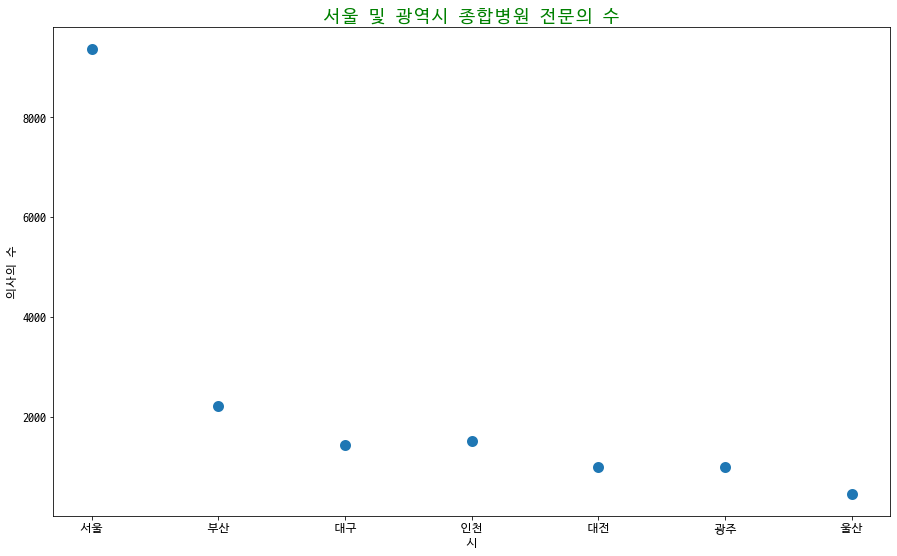

In [5]:
# 4.
x_data = []
y_data = []
title_font = {'size':18,'weight':'bold', 'color':'green'}
with open('doctor2.csv', 'r', encoding='utf8') as f:
    lines = csv.reader(f)
    header = next(lines)

    for line in lines:
        x_data.append(line[0])
        y_data.append(int(line[-1]))
        
plt.scatter(x_data, y_data, linewidth = 5)
plt.title('서울 및 광역시 종합병원 전문의 수',fontdict=title_font)
plt.xlabel('시')
plt.ylabel('의사의 수')

plt.show()

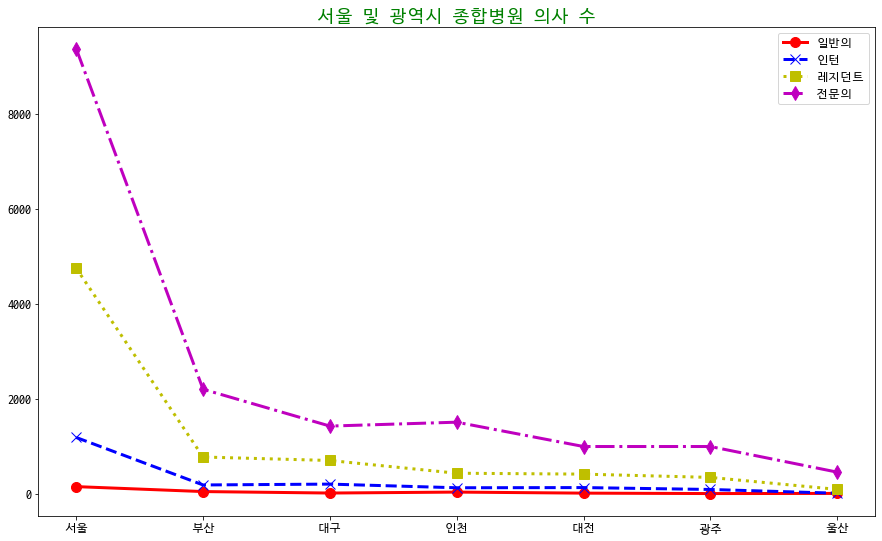

In [6]:
# 5.

x_data = []
y1_data = []
y2_data = []
y3_data = []
y4_data = []

with open('doctor2.csv', 'r', encoding='utf8') as f:
    lines = csv.reader(f)
    header = next(lines)

    for line in lines:
        x_data.append(line[0])
        y1_data.append(int(line[1]))
        y2_data.append(int(line[2]))
        y3_data.append(int(line[3]))
        y4_data.append(int(line[4]))

plt.plot(x_data, y1_data, 'ro-', label='일반의', linewidth =3, markersize=10)
plt.plot(x_data, y2_data, 'bx--',label='인턴', linewidth =3, markersize=10)
plt.plot(x_data, y3_data, 'ys:', label='레지던트',linewidth =3, markersize=10)
plt.plot(x_data, y4_data, 'md-.', label='전문의',linewidth =3, markersize=10)
plt.title('서울 및 광역시 종합병원 의사 수',fontdict=title_font)
plt.legend(loc='best')

plt.show()

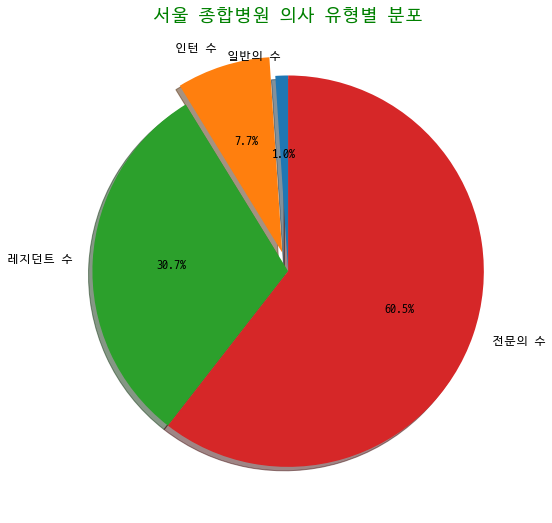

In [7]:
# 6.

x_data = []
y_data = [0,0,0,0]

with open('doctor2.csv', 'r', encoding='utf8') as f:
    lines = csv.reader(f)
    header = next(lines)
    for i in range(1, len(header)):
        x_data.append(header[i])
    
    for line in lines:
        if '서울' in line:
            for i in range(len(y_data)):
                y_data[i] += int(line[i+1])
  
y_data2 = []
sum = 0

for i in range(len(y_data)):
    sum += y_data[i]
    
for i in range(len(y_data)):
    y_data2.append(y_data[i] /  sum * 100)

plt.title('서울 종합병원 의사 유형별 분포',fontdict=title_font)
plt.pie(y_data2, explode = (0, 0.1, 0, 0), labels=x_data, autopct='%1.1f%%', shadow=True, startangle = 90)

plt.show()